Sešit naprd, v datech toho moc není.

In [1]:
import os
import pandas as pd

In [11]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))
wikid = pd.read_json(os.path.join("wikidata","wikidata.json"))
df = df.merge(wikid, on="interpret_hlavni", how="outer")

In [12]:
et = df.explode('etnicita')

In [13]:
et.groupby('etnicita').size().nlargest(25)

etnicita
Frankokanaďan                                        817
Italoameričané                                       817
Afroameričané                                        745
kosovský Albánec                                     445
Albánci                                              429
Portoričané  v USA                                   193
multirasový Američan                                 158
černoši                                              143
Canadian Americans                                    94
Black British                                         81
Indo Caribbeans                                       62
Iroameričané                                          43
Skotští Američané                                     43
Švédové                                               40
švédští Američané                                     29
Židé ve Spojeném království                           28
Arabové                                               20
arabští Američané     

In [16]:
def pomer(x):
    return  (et[et['etnicita'] == x].groupby('rok').size() / df.groupby('rok').size()).plot.bar()

<Axes: xlabel='rok'>

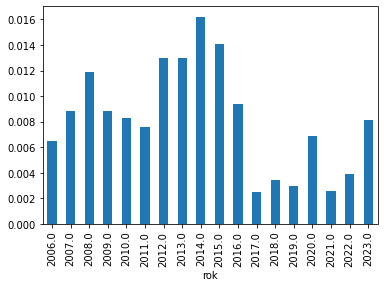

In [17]:
pomer('Afroameričané')

<Axes: xlabel='rok'>

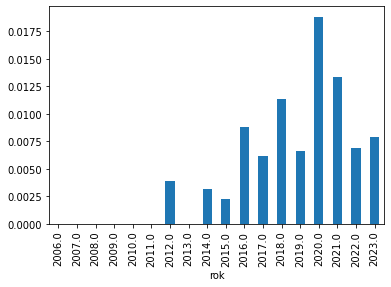

In [18]:
pomer('kosovský Albánec')

In [19]:
et[et['etnicita'] == 'kosovský Albánec']['interpret_hlavni'].drop_duplicates()

56280    Rita Ora
75764    Dua Lipa
Name: interpret_hlavni, dtype: object